In [1]:
# Install xgboost . Version is important. Can change overtime
! pip install xgboost==0.82

     |████████████████████████████████| 114.0 MB 22 kB/s /s eta 0:00:01


In [2]:
## please create the model with sklearn version = 0.20.4
! pip install scikit-learn==0.20.4

     |████████████████████████████████| 5.4 MB 4.8 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.1
    Uninstalling scikit-learn-0.23.1:
      Successfully uninstalled scikit-learn-0.23.1


In [4]:
import sklearn
sklearn.__version__

'0.20.4'

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
pd.options.display.float_format = '{:20,.2f}'.format

In [8]:
# Missing value = 0 is not an good option. Only for Training purpose
df = pd.read_csv("gs://datastorageicici/Day2/train_final.csv").fillna(0)

In [10]:
df.head()

,x36,x34,x35,x33,x32,x31,x4,x3,x2,x1,...,x30,x38,Target,x28,id,x39_1,x39_2,x39_3,x39_4,x39_5
0,24,15,"12,966.18","63,374.00",39,"76,340.18",6,"8,683.18",4,"15,632.00",...,15.00,0.00,0,1,1,1,0,0,0,0
1,42,7,"14,950.16","1,907.46",49,"16,857.62",19,"10,293.16",1,"1,270.46",...,4.00,0.00,0,1,2,0,0,1,0,0
2,18,13,"1,762.00","1,949.87",31,"3,711.87",0,0.00,1,"1,349.87",...,13.00,0.00,0,1,3,0,0,1,0,0
3,6,4,"6,640.00",420.00,10,"7,060.00",2,"5,620.00",0,0.00,...,2.00,0.00,1,1,4,0,0,1,0,0
4,2,1,"1,045.00",444.00,3,"1,489.00",0,0.00,0,0.00,...,1.00,0.00,0,1,5,1,0,0,0,0


In [9]:
df = pd.get_dummies(df, columns=['x39'])
print(list(df.columns))

['x36', 'x34', 'x35', 'x33', 'x32', 'x31', 'x4', 'x3', 'x2', 'x1', 'x6', 'x5', 'x16', 'x15', 'x14', 'x13', 'x18', 'x17', 'x10', 'x9', 'x8', 'x7', 'x12', 'x11', 'x22', 'x21', 'x20', 'x19', 'x24', 'x23', 'x37', 'x29', 'x30', 'x38', 'Target', 'x28', 'id', 'x39_1', 'x39_2', 'x39_3', 'x39_4', 'x39_5']


In [11]:
# Creating X & Y array's
y = df['Target'].values.ravel()
x = df.drop(['Target','id'],axis=1).values
# Splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [12]:
x_train.shape

(29327, 40)

In [14]:
x

array([[2.400000e+01, 1.500000e+01, 1.296618e+04, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [4.200000e+01, 7.000000e+00, 1.495016e+04, ..., 1.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.800000e+01, 1.300000e+01, 1.762000e+03, ..., 1.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [0.000000e+00, 3.000000e+00, 0.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.000000e+00, 0.000000e+00, 4.440000e+02, ..., 1.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]])

In [33]:
# Training Models
eval_set = [(x_train,y_train),(x_test,y_test)]

model = xgb.XGBClassifier(colsample_bytree= 0.65, min_child_weight= 4.0,
                          learning_rate=0.05,subsample= 0.70, max_depth= 3, 
                          n_estimators= 200,nthread= 6, gamma= 3,objective= "binary:logistic")

In [34]:
# Model fitting
model.fit(x_train,y_train,eval_metric= "logloss",verbose=False,eval_set=eval_set)
results = model.evals_result()

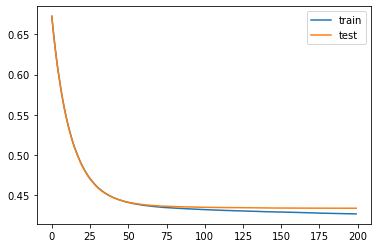

In [35]:
# Plotting loss 
import matplotlib.pyplot as plt
plt.plot(results['validation_0']['logloss'],label='train')
plt.plot(results['validation_1']['logloss'],label='test')
plt.legend(loc='upper right')
plt.show()

In [26]:
# Model 
pred_class = model.predict(x_test, ntree_limit = 75)
pred_prob  = model.predict_proba(x_test)

In [27]:
pred_prob[0:5]

array([[0.45578134, 0.54421866],
       [0.6899719 , 0.31002808],
       [0.752987  , 0.247013  ],
       [0.9403884 , 0.0596116 ],
       [0.97108936, 0.02891065]], dtype=float32)

In [32]:
# one can also get other metrics
from sklearn.metrics import roc_auc_score,f1_score
print('roc: '+str(roc_auc_score(y_test, pred_prob[:,1]))+' \nf1_score: '+str(f1_score(y_test, pred_class)))

roc: 0.7624160802912257 
f1_score: 0.26842105263157895


In [31]:
## Save model as .bst format in case no preprocessing is required in prediction, else use pickle
## model name should be model only. This will be used when model is deployed
model.save_model('model.bst')

In [14]:
## Pickle format
'''
import pickle
with open("/home/jupyter/model.pkl",'wb') as f:
    pickle.dump(model,f)
'''

'\nimport pickle\nwith open("/home/jupyter/model.pkl",\'wb\') as f:\n    pickle.dump(model,f)\n'